## Image Classification using Logistic Regression

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# MNIST is a public image dataset of hand-written digits
# This dataset is being fetched from the internet and may take some time to run
mnist = fetch_openml('mnist_784')

In [3]:
type(mnist)

sklearn.utils._bunch.Bunch

In [4]:
# mnist is a dictionary with several keys
# The keys relevant for us are data and target.
# mnist.data contains the pixel data for each image
# mnist.target contains the expected digit in that image
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
# Each image is a 28 x 28 array of pixels, which is stored here as a 1D array of size 784
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [7]:
# These are the images
# There are 70,000 images (28 by 28 images for a dimensionality of 784)
print(mnist.data.shape)
# These are the labels
print(mnist.target.shape)

(70000, 784)
(70000,)


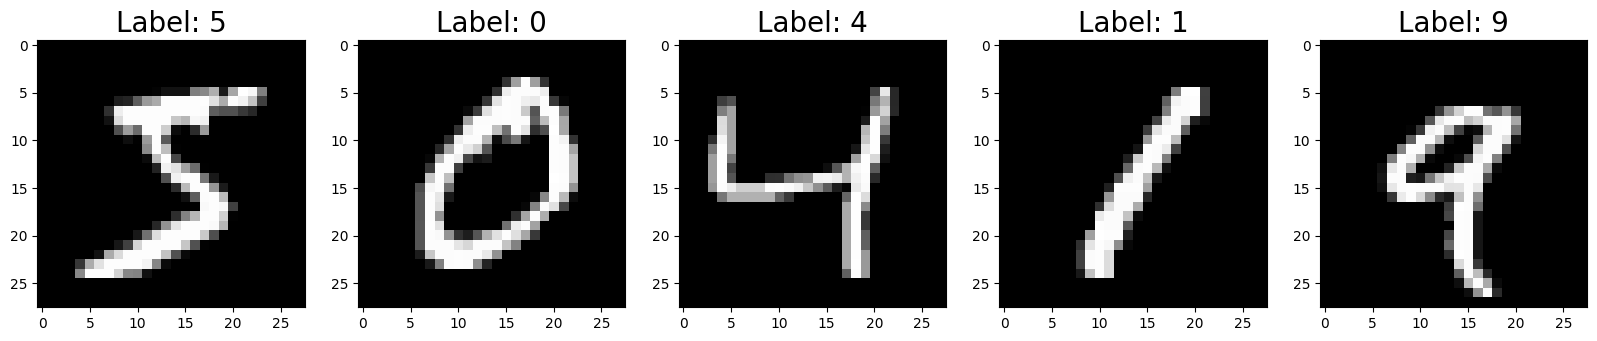

In [8]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(np.array(mnist.data.loc[0:4]), np.array(mnist.target.loc[0:4]))):
 plt.subplot(1, 5, index+1)
 plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
 plt.title('Label: ' + label,fontsize=20)

In [9]:
df_data = mnist.data.loc[0:19999].copy()
df_labels = mnist.target.loc[0:19999].copy()

In [10]:
df_data.dtypes

pixel1      float64
pixel2      float64
pixel3      float64
pixel4      float64
pixel5      float64
             ...   
pixel780    float64
pixel781    float64
pixel782    float64
pixel783    float64
pixel784    float64
Length: 784, dtype: object

In [11]:
# This step does normalisation so that all the DataFrame entries are real numbers in the range [0,1].
# Normalisation is important for ML algorithms to work well.
for col in df_data.columns:
  df_data[col] = [item/256.0 for item in list(df_data[col])]

In [12]:
# Dataset split in training and testing sets
train_image, test_image, train_label, test_label = train_test_split(df_data, df_labels, test_size=0.3, random_state=0)

train_image.reset_index(drop=True,inplace=True)
test_image.reset_index(drop=True,inplace=True)

train_label.reset_index(drop=True,inplace=True)
test_label.reset_index(drop=True,inplace=True)

In [13]:
# logreg = LogisticRegression(solver = 'lbfgs',verbose=True)
logreg = LogisticRegression(solver = 'lbfgs')
# logreg = LogisticRegression(multi_class = 'multinomial', max_iter = 1e3, C = 1, solver = 'sag')

In [14]:
logreg.fit(train_image,train_label)

LogisticRegression()

In [15]:
print(test_label.loc[0])
logreg.predict(np.array(test_image.loc[0]).reshape(1,-1))

6


array(['6'], dtype=object)

In [16]:
accuracy = logreg.score(test_image, test_label)
print(accuracy)

0.914
